In [254]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from scipy import stats as st
import seaborn as sn
import pandas as pd
import numpy as np

In [2]:
digits = load_digits()

In [3]:
with open('mnist-y.data') as file:
    chars = [line[0] for line in file]

In [4]:
vectors = []
with open('mnist-x.data') as file:
    for line in file:
        vectors.append([1.0 if float(v) == 1 else -1.0 for v in line.strip().split(',')])

<Figure size 640x480 with 0 Axes>

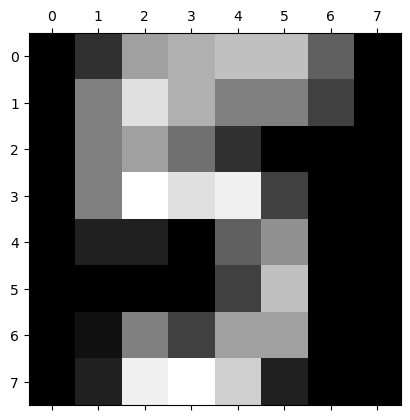

In [5]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1003])
plt.show()

In [6]:
vectors = np.array(vectors)

In [7]:
vectors.shape

(6000, 784)

In [50]:
chars=np.array(chars)

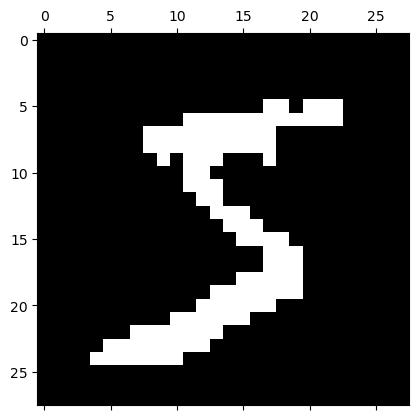

5


In [8]:
plt.matshow(vectors[0].reshape(28,28))
plt.show()
print(chars[0])

# KNN

In [9]:
digits['data'] = np.where(digits['data']>0,1,-1)

In [10]:
digits["data"].shape

(1797, 64)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(vectors,chars,test_size=0.20, random_state=42)

In [12]:
X_train.shape

(4800, 784)

In [13]:
digits = load_digits()
data = pd.DataFrame(digits.data)
labels = pd.Series(digits.target)
standardized_data = MinMaxScaler().fit_transform(data)
#(1797, 64)
embedding = TSNE(n_components=2)#, normalized_stress='auto')
X_transformed = embedding.fit_transform(standardized_data)
X_transformed = np.vstack((X_transformed.T, labels)).T

c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [14]:
print(X_transformed)

[[  2.64620399 -70.97875214   0.        ]
 [-10.20453644  -2.84650803   1.        ]
 [ -8.40073872  21.8873291    2.        ]
 ...
 [ -0.54830164  14.00076389   8.        ]
 [ 26.30217171  27.35777092   9.        ]
 [  3.082973    19.07865334   8.        ]]


In [15]:
digits_train,digits_test= train_test_split(tsne_digits,test_size=0.20, random_state=42)

NameError: name 'tsne_digits' is not defined

In [16]:
X_test.shape

(1200, 784)

In [260]:
def predict(Xtrain,train_labels,test_point,k):
    X_train=Xtrain.copy()
    X_train[:,0]=X_train[:,0].astype(float)-test_point[0]
    X_train[:,1]=X_train[:,1].astype(float)-test_point[1]
    distances = np.linalg.norm(X_train[:,[0,1]], axis=1)
    nearest_neighbors = np.argsort(distances)[:k]
    nearest_neighbors=nearest_neighbors.astype(int)
    closets_neigh=train_labels[nearest_neighbors]
    return st.mode(closets_neigh)[0][0]

In [220]:
embedding = TSNE(n_components=2)#, normalized_stress='auto')
X_transformed_train = embedding.fit_transform(X_train)
X_transformed_train = np.vstack((X_transformed_train.T, y_train)).T


c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\afrincon\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [235]:
print(X_transformed_train)

[['1.9943146' '48.907383' '1']
 ['-5.957945' '38.900978' '8']
 ['48.0358' '-8.264525' '3']
 ...
 ['-12.327148' '-54.23597' '6']
 ['-25.628918' '21.305511' '9']
 ['32.595657' '-58.709393' '0']]


In [238]:
arr=predict(X_transformed_train,y_train,[5,3])
print(arr)

[3178 1464 2764  984  657 3638 2627 3412  586 1077  640 2577 2431 3052
  713  326 3966 4244  661 3110]
['5' '3' '1' '3' '1' '3' '3' '8' '1' '1' '1' '3' '1' '1' '1' '1' '1' '1'
 '1' '1']
1


C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\3274651737.py:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\3274651737.py:11: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  return st.mode(closets_neigh)[0][0]


In [262]:
def test(k):
    embedding = PCA(n_components=2)#, normalized_stress='auto')
    X_transformed_train = embedding.fit_transform(X_train)
    X_transformed_train = np.vstack((X_transformed_train.T, y_train)).T
    X_transformed_test = embedding.fit_transform(X_test)
    success = 0
    examples = X_transformed_test[:,[0,1]]
    for e in range(len(examples)):
        z = predict(X_transformed_train,y_train,X_transformed_test[e],k)
        if z == y_test[e]:
            success += 1
    return float(success) / len(examples)
test_1=test(1)
print(test_1)
test_10=test(10)
print(test_10)
test_50=test(50)
print(test_50)
test_100=test(100)
print(test_100)
test_500=test(500)
print(test_500)
test_1000=test(1000)
print(test_1000)

C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see http

0.36916666666666664


C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see http

0.43166666666666664


C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see http

0.44416666666666665


C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see http

0.4375


C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see http

0.42583333333333334


C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return st.mode(closets_neigh)[0][0]
c:\Users\afrincon\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\afrincon\AppData\Local\Temp\ipykernel_1728\2725144360.py:9: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see http

0.4266666666666667


In [ ]:
predict(X_train)

[[-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]
 [-1. -1. -1. ... -1. -1. -1.]]


NameError: name 'closest_class' is not defined

## Prostate

In [ ]:
import pandas as pd

In [ ]:
prostate_data = pd.read_csv('prostate.csv')

In [ ]:
#Divide the data set, and apply the K-NN. Test the accuracy, the training error, and the test error.

# Perceptron

In [ ]:
data = [{'vector': v, 'char': c} for (v, c) in zip(vectors, chars)]

In [ ]:
def train(target_char, opposite_char, steps):
    train_data = data[:5000]
    train_data = [e for e in train_data if e['char'] in (target_char, opposite_char)]
    w = np.zeros(784)
    i = 0
    weights = w
    # Implement perceptron, remember:
    if z >= 0 and y == opposite_char:
        #TODO
    elif z < 0 and y == target_char:
        #TODO
    return w

def error(target_char, opposite_char,data,w):
    success = 0
    for e in data:
        z = np.dot(e['vector'], w)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1
    return float(success) / len(data)

def test(target_char, opposite_char,weights):
    success = 0
    examples = data[5000:]

    examples = [e for e in examples if e['char'] in (target_char, opposite_char)]

    for e in examples:
        z = np.dot(e['vector'], weights)
        if (z >= 0 and e['char'] == target_char) or (z < 0 and e['char'] == opposite_char):
            success += 1

    return float(success) / len(examples)

IndentationError: expected an indented block (2579002564.py, line 10)

In [ ]:
weights = train('1','2',100)

In [ ]:
test('1','2',weights)